In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from shallowData import load_dataset
%matplotlib inline

In [5]:
train_set_x_orig, test_set_x_orig,train_set_y,test_set_y, classes = load_dataset()

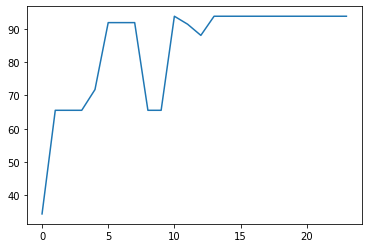

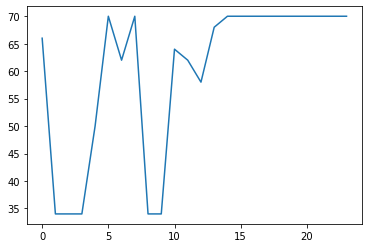

Train accuracy93.77990430622009%
Test accuracy70.0%


In [8]:
train_set_x_flat=train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
train_set_x=train_set_x_flat/255

test_set_x_flat=test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
test_set_x=test_set_x_flat/255

n_h=10
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s
def layer_sizes(X,Y):
    n_x=X.shape[0]
    n_y=Y.shape[0]
    return n_x,n_y
def initialize_parameters(X,n_x,n_h,n_y):
    m=X.shape[1]
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)
    b2=np.zeros((n_y,1))
    parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    return parameters
def forward_propagation(parameters,X):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    cache={"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}
    return A2,cache
def backward_propagation(cache,parameters,X,Y):
    m=X.shape[1]
    A1=cache["A1"]
    A2=cache["A2"]
    W2=parameters["W2"]
    dZ2=A2-Y
    dW2=np.dot(dZ2,A1.T)/m
    db2=np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1=np.dot(dZ1,X.T)
    db1=np.sum(dZ1,axis=1,keepdims=True)/m
    grads={"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2}
    return grads
def update_parameters(parameters,grads,learning_rate):
    W1=parameters["W1"]
    W2=parameters["W2"]
    b1=parameters["b1"]
    b2=parameters["b2"]
    db1=grads["db1"]
    db2=grads["db2"]
    dW1=grads["dW1"]
    dW2=grads["dW2"]
    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2
    b1=b1-learning_rate*db1
    b2=b2-learning_rate*db2
    parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    return parameters
def predict(parameters,X_train):
    A2,cache=forward_propagation(parameters,X_train)
    Y_prediction=np.round(A2)
    return Y_prediction
def training_model(X_train,Y_train,num_iterations,learning_rate):
    n_x,n_y=layer_sizes(X_train,Y_train)
    parameters=initialize_parameters(X_train,n_x,n_h,n_y)
    train=[]
    test=[]
    for i in range(num_iterations):
        A2,cache=forward_propagation(parameters,X_train)
        grads=backward_propagation(cache,parameters,X_train,Y_train)
        parameters=update_parameters(parameters,grads,learning_rate)
        if(i%250==0):
            Y_train_prediction=predict(parameters,train_set_x)
            train.append(100-np.mean(np.abs(Y_train_prediction-train_set_y))*100)
            Y_test_prediction=predict(parameters,test_set_x)
            test.append(100-np.mean(np.abs(Y_test_prediction-test_set_y))*100)
    plt.plot(train)
    plt.show()
    plt.plot(test)
    plt.show()
    return parameters
param=training_model(train_set_x,train_set_y,6000,0.0025)
Y_train_prediction=predict(param,train_set_x)
Y_test_prediction=predict(param,test_set_x)
print("Train accuracy{}%".format(100-np.mean(np.abs(Y_train_prediction-train_set_y))*100))
print("Test accuracy{}%".format(100-np.mean(np.abs(Y_test_prediction-test_set_y))*100))